Chapter 17

# 二分法
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)



这段代码实现了使用**二分法**对函数的根进行求解，并且通过可视化的方式展示了二分法的迭代过程以及收敛性。下面从数学角度详细描述各部分的功能及其数学背景。

---

### 代码描述及数学分析

#### 1. **绘图参数设置**
代码首先使用 `matplotlib` 设置绘图参数，包括字体、刻度和网格样式。主要是为了增强可视化效果，便于后续二分法迭代结果的展示。

#### 2. **目标函数定义**
目标函数被定义为：
$$
f(x) = 2x^2 - 8x + 1
$$
这个函数是一个二次多项式，其根可以通过求解 $f(x) = 0$ 得到。`sympy` 提供符号处理功能，而 `lambdify` 将符号表达式转换为可执行的 Python 函数，以便后续数值计算。

#### 3. **二分法求根**
二分法是一种基础的数值分析方法，用于求解函数 $f(x)$ 的根。该方法的数学思想是基于连续函数在区间上的**中值定理**：如果 $f(a) \cdot f(b) < 0$，那么 $f(x)$ 在区间 $[a, b]$ 内至少存在一个根。具体步骤如下：

1. 初始区间为 $[a, b]$，其中 $f(a) \cdot f(b) < 0$。
2. 计算中点 $c = \frac{a + b}{2}$，并检查 $f(c)$ 的符号：
   - 若 $f(c) = 0$，则 $c$ 是精确根；
   - 若 $f(c) \cdot f(a) < 0$，则根在 $[a, c]$ 内；
   - 否则根在 $[c, b]$ 内。
3. 重复上述步骤，直到区间长度小于指定容差 $tol$ 或达到最大迭代次数。

代码实现的核心数学公式为：
$$
c_k = \frac{a_k + b_k}{2}
$$
其中 $a_k$ 和 $b_k$ 是第 $k$ 次迭代的区间端点。

函数 `bisection_method` 返回：
- 近似根 $c$；
- 迭代次数；
- 每次迭代的区间端点和中点记录（便于可视化）。

#### 4. **二分法的可视化**
二分法过程的可视化包括以下两部分：
1. **函数曲线及区间变化**：展示每次迭代时的区间变化和函数值的对应关系。
   - 横轴表示 $x$ 值；
   - 纵轴表示 $f(x)$ 值；
   - 每次迭代的区间用线段标记，终点表示区间端点 $a_k$ 和 $b_k$。
   
2. **收敛性分析**：绘制每次迭代的近似根 $c_k$ 随迭代次数的变化图，反映收敛速率。

#### 5. **测试部分**
调用 `bisection_method` 对函数 $f(x)$ 在区间 $[-2, 2]$ 上的根进行求解，并使用 `visualize_bisection` 和 `visualize_convergence` 展示结果。
- 起始区间 $[-2, 2]$ 满足 $f(-2) \cdot f(2) < 0$，因此二分法可以应用。
- 输出近似根 $c$ 及迭代次数，验证方法的有效性。

---

### 数学背景补充
1. **收敛性**：
   二分法的误差界限在每次迭代后减半。若初始区间长度为 $|b - a|$，则经过 $n$ 次迭代后，误差为：
   $$
   \text{误差} \leq \frac{|b - a|}{2^n}
   $$
   这表明二分法以线性收敛速度逼近根。

2. **适用范围**：
   二分法要求函数在初始区间内连续，且 $f(a) \cdot f(b) < 0$。对于无解或多解情况，需结合其他方法分析。

3. **图示解释**：
   - 可视化的区间收缩和根的逐步逼近说明了二分法的本质：通过不断缩小区间逐步逼近目标根。
   - 收敛图展示了 $c_k$ 随迭代次数单调收敛于真实根的过程。

--- 

通过此代码及可视化过程，可以直观地理解二分法的理论和实际应用，是数值分析学习的良好案例。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify

In [2]:
p = plt.rcParams  # 获取默认绘图参数
p["font.sans-serif"] = ["Roboto"]  # 设置无衬线字体为 Roboto
p["font.weight"] = "light"  # 设置字体粗细为 light
p["ytick.minor.visible"] = True  # 显示 y 轴的小刻度
p["xtick.minor.visible"] = True  # 显示 x 轴的小刻度
p["axes.grid"] = True  # 启用坐标轴网格
p["grid.color"] = "0.5"  # 设置网格颜色为灰色
p["grid.linewidth"] = 0.5  # 设置网格线宽度

## 使用 sympy 定义目标函数

In [3]:
x = symbols('x')
func = 2*x**2 - 8*x + 1
func

2*x**2 - 8*x + 1

In [4]:
# 将函数转换为可执行的 Python 函数
f = lambdify(x, func, 'numpy')

## 二分法求根函数

In [5]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError("函数在区间两端的符号相同，无法使用二分法。")

    iter_count = 0
    a_vals, b_vals, c_vals = [a], [b], []  # 记录区间变化以便可视化

    while (b - a) / 2 > tol and iter_count < max_iter:
        c = (a + b) / 2
        c_vals.append(c)
        if f(c) == 0:  # 找到精确根
            break
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c

        a_vals.append(a)
        b_vals.append(b)
        iter_count += 1

    return c, iter_count, a_vals, b_vals, c_vals

## 可视化二分过程

In [6]:
def visualize_bisection(f, a_vals, b_vals, c_vals):
    x = np.linspace(-3, 3, 500)
    y = f(x)

    plt.figure(figsize=(6, 6))
    plt.plot(x, y, color="blue")
    # plt.axhline(0, color="black", linewidth=0.8, linestyle="-")

    # 可视化每一步的区间
    for i, (a, b, c) in enumerate(zip(a_vals, b_vals, c_vals)):
        plt.plot([a, b], [f(a), f(b)], "kx-", lw = '0.2')

    # plt.title("Bisection Method Visualization")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(-3,3)
    plt.grid(True)
    # plt.savefig('数值求根_二分法.svg')
    plt.show()

In [7]:
def visualize_convergence(x_vals):

    plt.figure(figsize=(6, 3))
    plt.plot(np.arange(len(x_vals)),x_vals, marker = 'x')
    plt.xlim(0,len(x_vals) - 1)
    plt.xlabel('Iteration')
    plt.ylabel('Approximated root')
    # plt.savefig('数值求根_二分法_收敛.svg')

## 测试

求得根的近似值: 0.12917137145996094
迭代次数: 21


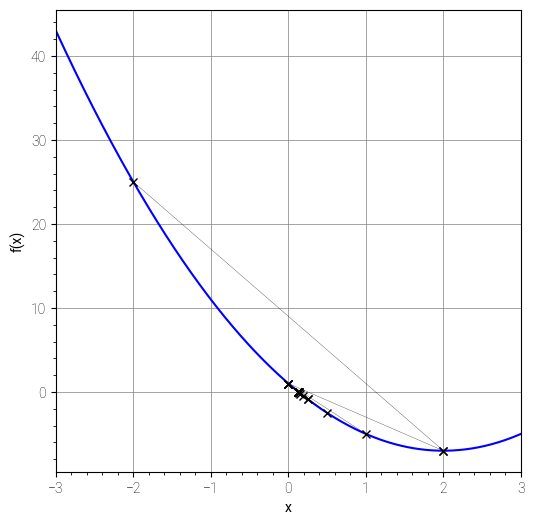

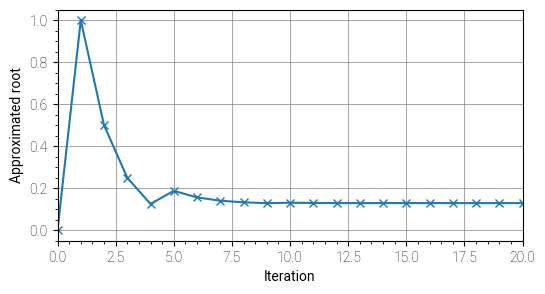

In [8]:
try:
    root, iterations, a_vals, b_vals, c_vals = bisection_method(f, a=-2, b=2)
    print(f"求得根的近似值: {root}")
    print(f"迭代次数: {iterations}")

    # 可视化
    visualize_bisection(f, a_vals, b_vals, c_vals)
    visualize_convergence(c_vals)

except ValueError as e:
    print(e)